In [7]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [9]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ce02ec5486fcfb30430ac99466f01ab


In [10]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-11.157320752803173 27.383586979358228
-20.264910243378438 144.73168132164722
-39.65297399313072 26.870339024548457
51.54798443715541 -90.78745600436571
-38.28398511627799 -46.94446783588617
74.59472057621531 140.11032464692272
50.45726002780867 -47.55628428639022
-44.546309615796645 40.36499917935447
24.350687502335532 101.91179987840286
-25.558063278886394 154.64401670303965
-41.82606982019773 35.04276888819186
-31.96647568663812 -116.63249423142288
-50.38574373172759 -59.763203368999996
-78.48061470636118 2.2806880481979306
-56.990990944878746 -22.471281743533325
80.81124134230495 -123.71427472394663
-88.47847403357218 172.2265951751864
24.75526054011523 44.433847175289856
25.854347490007854 158.12296206517027
-53.537192201611 71.89373987673372
-13.476540063836865 9.31387845421068
55.11344130992569 122.09867810386328
76.55307668288074 48.36554290003039
-72.79598198757985 55.798246072271155
9.90794933420213 1.702041059689975
-34.06505174941898 99.62257690671686
8.801240138383008 -115

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

636

In [15]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrival Complete.      ")
print("-----------------------------")
    
# Create an empty list to hold the weather data
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
        
    # Create endpoint URL wiht each city
    #city_url = url + "&q=" + cities[i]
    
    

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | lubumbashi
Processing Record 2 of Set 1 | charters towers
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | bonavista
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | zhoucheng
Processing Record 10 of Set 1 | hervey bay
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | rawson
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | buraydah
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | namibe
Proc

Processing Record 39 of Set 4 | asfi
Processing Record 40 of Set 4 | saint-ambroise
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | awjilah
Processing Record 43 of Set 4 | mishelevka
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | cocula
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | illapel
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | vostok
Processing Record 3 of Set 5 | sheridan
Processing Record 4 of Set 5 | cassilandia
Processing Record 5 of Set 5 | carutapera
Processing Record 6 of Set 5 | salym
Processing Record 7 of Set 5 | nelson bay
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | ongandjera
Processing Record 10 of Set 5 | ponta do sol
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | barreirinhas
Processing Record 13 of

Processing Record 33 of Set 8 | pionerskiy
Processing Record 34 of Set 8 | khatanga
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | mahibadhoo
Processing Record 37 of Set 8 | port moresby
Processing Record 38 of Set 8 | fuerte olimpo
Processing Record 39 of Set 8 | lazarev
Processing Record 40 of Set 8 | antalaha
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | hirara
Processing Record 43 of Set 8 | topi
Processing Record 44 of Set 8 | formosa do rio preto
Processing Record 45 of Set 8 | garachine
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 8 | ewa beach
Processing Record 49 of Set 8 | san antonio
Processing Record 50 of Set 8 | freeport
Processing Record 1 of Set 9 | lorengau
Processing Record 2 of Set 9 | bati
Processing Record 3 of Set 9 | yumen
Processing Record 4 of Set 9 | padre paraiso
Processing Record 5 of Set 9 | aswan
Processing Record 6 of Set 9 | nioro
Processing

Processing Record 20 of Set 12 | baykit
Processing Record 21 of Set 12 | salamiyah
Processing Record 22 of Set 12 | colchester
Processing Record 23 of Set 12 | qinhuangdao
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | sosva
Processing Record 26 of Set 12 | dharmabad
Processing Record 27 of Set 12 | calbuco
Processing Record 28 of Set 12 | kinkala
Processing Record 29 of Set 12 | khandbari
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | mrirt
City not found. Skipping...
Processing Record 32 of Set 12 | koulikoro
Processing Record 33 of Set 12 | cabatuan
Processing Record 34 of Set 12 | marechal candido rondon
Processing Record 35 of Set 12 | teahupoo
Processing Record 36 of Set 12 | katesh
Processing Record 37 of Set 12 | mega
Processing Record 38 of Set 12 | manoel urbano
Processing Record 39 of Set 12 | kenai
Processing Record 40 of Set 12 | springbok
Processing Record 41 of Set 12 | vung tau
Processing Record 42 of Set 12 | pango

In [16]:
len(city_data)

589

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lubumbashi,-11.6609,27.4794,62.65,98,58,5.39,CD,2022-11-22 21:17:32
1,Charters Towers,-20.1000,146.2667,76.87,78,51,12.62,AU,2022-11-22 21:22:15
2,Port Elizabeth,-33.9180,25.5701,68.31,85,38,3.00,ZA,2022-11-22 21:22:16
3,Sioux Lookout,50.1001,-91.9170,24.87,86,100,4.61,CA,2022-11-22 21:22:17
4,Chuy,-33.6971,-53.4616,63.77,77,79,11.43,UY,2022-11-22 21:22:17
5,Bonavista,48.6499,-53.1147,32.76,95,100,15.35,CA,2022-11-22 21:22:19
6,Zhoucheng,35.9122,116.3117,44.67,88,2,2.01,CN,2022-11-22 21:22:20
7,Hervey Bay,-25.2986,152.8535,69.03,75,88,14.00,AU,2022-11-22 21:22:20
8,East London,-33.0153,27.9116,65.93,90,70,6.20,ZA,2022-11-22 21:20:17
9,Rikitea,-23.1203,-134.9692,74.01,85,97,12.82,PF,2022-11-22 21:22:21


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

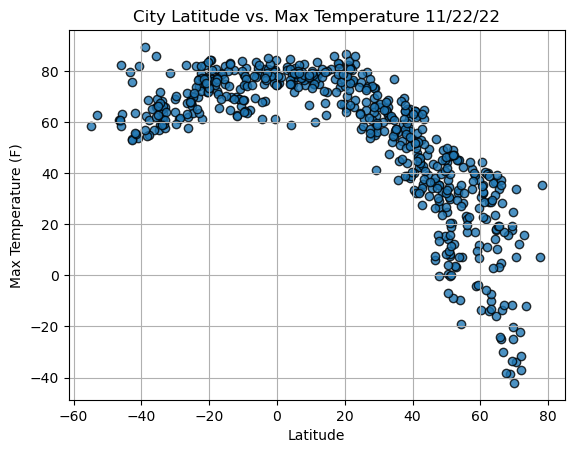

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig1.png")

# Show plot
plt.show()

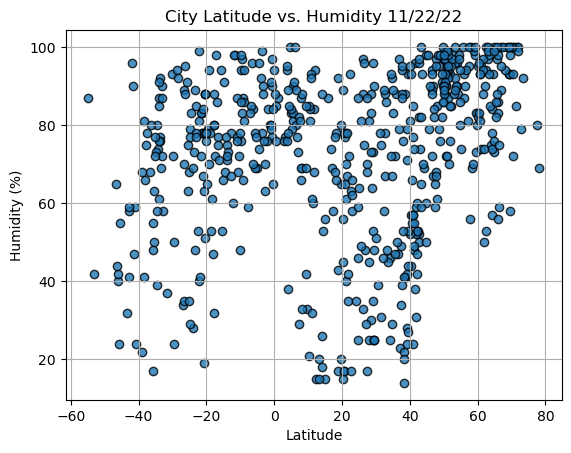

In [22]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig2.png")

# Show plot
plt.show()

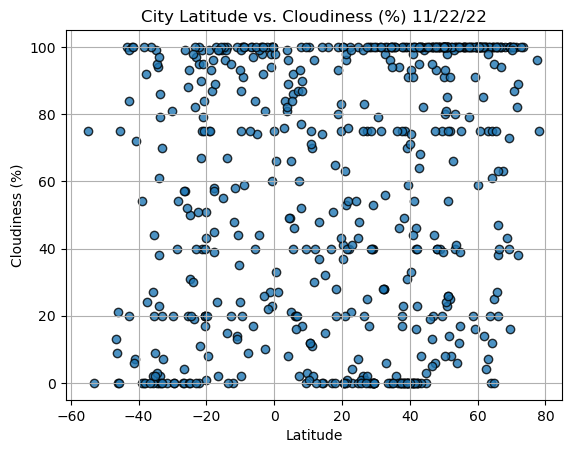

In [23]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig3.png")

# Show plot
plt.show()

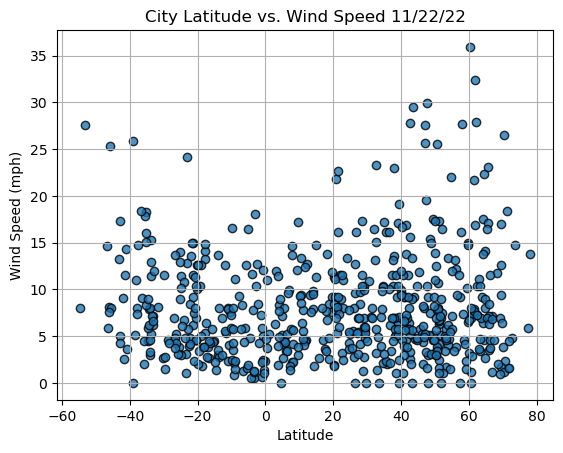

In [24]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphe properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig4.png")

# Show plot
plt.show()